# Linear Regression : Hypothesis and Error Function

## Hypothesis Function ( Model Prediction ) :

$y = m \cdot x + b$

 -	y: predicted output
 -	x: input feature
 -	m: slope (weight)
 - b: intercept (bias)

## Mean Squared Error ( Cost Function ) ⁉

$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$

 -	E: cost (error)
 -	n: number of data points
 -	y_i: actual value
 - x_i: input value for the i^{th} sample
 - m \cdot x_i + b: predicted value
 - The squared term ensures positive error and penalizes larger deviations.



 - The hypothesis y = m \cdot x + b defines the linear relationship between the input x and the predicted output.
 - The cost function E calculates the average squared difference between predicted and actual values across all data points.
 - This is what gradient descent will minimize to find the optimal values for m and b.

- We need to find the Lowest E
- The only thing we can change is m and b
- Hence we take the partial derivative with respect to m and b
- We then go to the steepest descent

## Gradient Derivation in Linear Regression

We Start with the Cost function ( Mean Square Error )

$E = \frac{1}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)^2$

### Partial Derivative with Respect to m ( Slope ) 🇰

$\frac{\partial E}{\partial m}
= \frac{1}{n} \sum_{i=0}^{n} 2 \cdot \left( y_i - (m \cdot x_i + b) \right) \cdot (-x_i)
= -\frac{2}{n} \sum_{i=0}^{n} x_i \cdot \left( y_i - (m \cdot x_i + b) \right)$

 - We apply the chain rule to differentiate the squared term.
 - The x_i comes from differentiating the inner linear term with respect to m.
 - This derivative tells you how much the error changes when you nudge the slope m.

### Partial Derivate with Respect to b ( Intercept )

$\frac{\partial E}{\partial b}
= -\frac{2}{n} \sum_{i=0}^{n} \left( y_i - (m \cdot x_i + b) \right)$

 - Again, using the chain rule, but this time with respect to b, which doesn’t multiply x_i.
 - This tells you how much to update the bias/intercept during gradient descent.

### Used in Gradient Descent Updates

In each iteration of gradient descent

$m = m - learningrate * dE/dm$
$b = b - learningrate * dE/db$

 - These updates reduce the error by moving m and b in the direction of steepest descent
 - Learning Rate is the rate of how muhc we change m and b, normally 0.0001 we want to make it small as it minimises the chance the algorithm can jump

# Code for Linear Regression

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

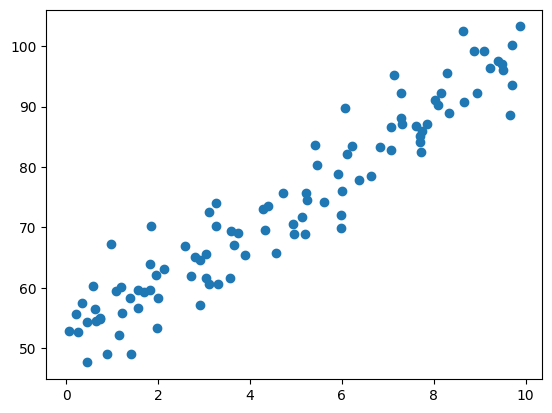

In [54]:
data = pd.read_csv('StudyDataset.csv')
plt.scatter(data.StudyTime, data.Score)

In [55]:
def loss(m, b, points):
    n = len(points)
    E = 0
    for i in range(n):
      Y = points.iloc[i].Score
      X = points.iloc[i].StudyTime
      E += (Y - ((m * X) + b))**2

    E = E / n
    return E

In [56]:
def gradient_descent(m_now, b_now, points, L):
  m_gradient = 0
  b_gradient = 0

  n = len(points)

  for i in range(n) :
    X = points.iloc[i].StudyTime
    Y = points.iloc[i].Score
    m_gradient += X * (Y - ((m_now * X) + b_now))
    b_gradient += (Y - ((m_now * X) + b_now))

  m_gradient, b_gradient = ((-2/n) * m_gradient) , ((-2/n) * b_gradient)
  m = m_now - (m_gradient * L)
  b = b_now - (b_gradient * L)

  return m, b

In [57]:
m = 0
b = 0
l = 0.0001
epochs = 1000

for i in range (epochs):
  m, b = gradient_descent(m, b, data, l)


11.899410783397704 4.545350403049688


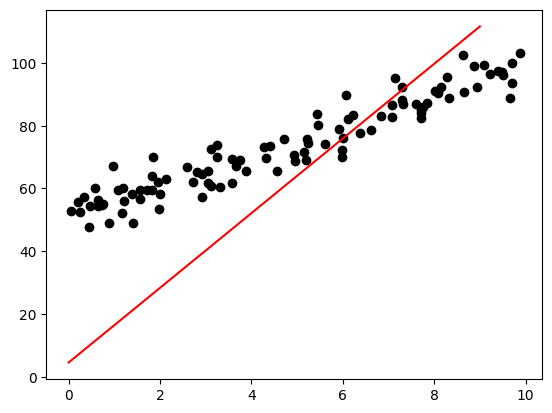

In [58]:
print(m,b)

plt.scatter(data.StudyTime, data.Score, color="black")
plt.plot(list(range(0,10)), [m * x + b for x in range(0,10)], color="red")

In [ ]:
m = 11.899
b = 4.54
l = 0.0001
epochs = 20000

for i in range (epochs):
  m, b = gradient_descent(m, b, data, l)


7.12851445748742 35.73112712086584


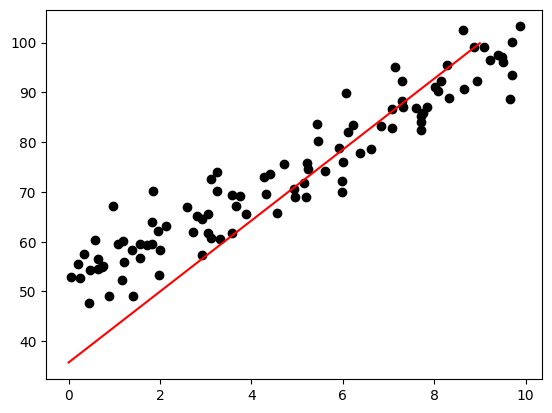

In [60]:
print(m,b)

plt.scatter(data.StudyTime, data.Score, color="black")
plt.plot(list(range(0,10)), [m * x + b for x in range(0,10)], color="red")

### Predictions

Lets say i Study 5 Hours for my Exam

What would be my predicted score ?

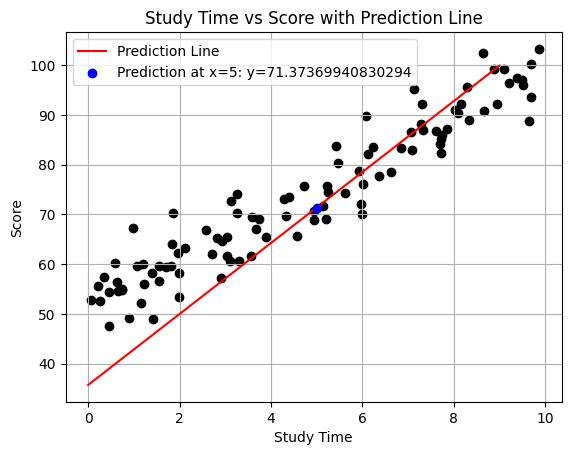

In [61]:
# Scatter plot of the data
plt.scatter(data.StudyTime, data.Score, color="black")

# Prediction line
x_vals = list(range(0, 10))
y_vals = [m * x + b for x in x_vals]
plt.plot(x_vals, y_vals, color="red", label="Prediction Line")

# Specific prediction at x = 5
x_pred = 5
y_pred = m * x_pred + b
plt.scatter(x_pred, y_pred, color="blue", zorder=5, label=f"Prediction at x=5: y={y_pred}")

plt.xlabel("Study Time")
plt.ylabel("Score")
plt.legend()
plt.title("Study Time vs Score with Prediction Line")
plt.grid(True)
plt.show()

# Multiple Variable Linear Regression

Goal ?

Use more than one input to predict the score -- For example :     

 - Study Time
 - Sleep Hours
 - Social Media Hours

### First We Generate the Data needed to compute the algorithm

In [62]:
np.random.seed(42)
n = 100

# Random Data -- Creates a Unformly distributed random numbers as Data
study_time = np.random.uniform(0, 10, n)
sleep_hours = np.random.uniform(4, 9, n)
social_media_hours = np.random.uniform(0, 5, n)
b= 0

# True relationship: score = 5*study_time + 3*sleep_hours - 2*social_media_hours + 50 + noise
# Add Noise to simulate Real-World and Score models a Linear Relationship between Features and Targets
noise = np.random.normal(0, 5, n)
score = 5*study_time + 3*sleep_hours - 2*social_media_hours + 50 + noise

df_multi = pd.DataFrame({
    'StudyTime': study_time,
    'SleepHours': sleep_hours,
    'SocialMediaHours': social_media_hours,
    'Score': score
})

### Multivariable Linear Regression: Gradient Descent Derivation

### Cost Function (Mean Squared Error)

For multivariable linear regression, our hypothesis is:

$$
\hat{y}_i = w_1 x_{i1} + w_2 x_{i2} + \dots + w_k x_{ik} + b
$$

The cost function becomes:

$$
E = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \left( \sum_{j=1}^{k} w_j x_{ij} + b \right) \right)^2
$$

Where:
- $n$: number of training examples  
- $k$: number of features  
- $x_{ij}$: value of the $j^{th}$ feature for the $i^{th}$ example  
- $w_j$: weight for feature $j$  
- $b$: bias (intercept)  

---

### Partial Derivative with Respect to $w_j$ (Feature Weights)

$$
\frac{\partial E}{\partial w_j} = -\frac{2}{n} \sum_{i=1}^{n} x_{ij} \cdot \left( y_i - \left( \sum_{l=1}^{k} w_l x_{il} + b \right) \right)
$$

- We apply the chain rule to differentiate the squared error.  
- $x_{ij}$ arises from the partial derivative of the inner function with respect to $w_j$.  
- This gradient tells us how much the error changes as we update $w_j$.

---

### Partial Derivative with Respect to $b$ (Intercept)

$$
\frac{\partial E}{\partial b} = -\frac{2}{n} \sum_{i=1}^{n} \left( y_i - \left( \sum_{j=1}^{k} w_j x_{ij} + b \right) \right)
$$

- We again use the chain rule, this time with respect to $b$.  
- Since $b$ is not multiplied by a feature, its derivative only aggregates the residual error.

---

### Gradient Descent Update Rules

At each iteration of gradient descent, we update:

$$
w_j = w_j - \text{learningrate} \cdot \frac{\partial E}{\partial w_j}, \quad \text{for all } j = 1, 2, \dots, k
$$

$$
b = b - \text{learningrate} \cdot \frac{\partial E}{\partial b}
$$

- These updates move the parameters in the direction of steepest descent.  
- The learning rate controls how large each update step is (e.g., 0.0001).


In [63]:
# Selects the Input features from the Dataframe as Input Train Dataset
X = df_multi[['StudyTime', 'SleepHours', 'SocialMediaHours']].values

# Selected the Outputs
y = df_multi['Score'].values

# So we dont have to do +b, adds a 1 As a Adjusting Number
X = np.c_[X, np.ones(n)]

In [64]:
def gradient_descent_multi(X, y, weights, L=0.0001, ) :
  # Make Prediction ( Matrix Dot multiplication to Reduce code length and Matrix Multiplications are Faster)
  # Calculate the Error then the Gradient
  y_pred = X.dot(weights)
  error = y_pred - y

  # Calculates the Error of the MSE cost function
  gradient = (2/m) * X.T.dot(error)

  weights -= L * gradient
  return weights


In [65]:
m,n = X.shape
weights = np.zeros(n)

# Countinuesly trains the Model
for epoch in range(1000):
  weights = gradient_descent_multi(X, y, weights)



In [66]:
print(weights)

[6.11375259 7.82328443 2.23053138 1.42744639]


## Now the training process is Over we can Plot the Results showing a perfect training process

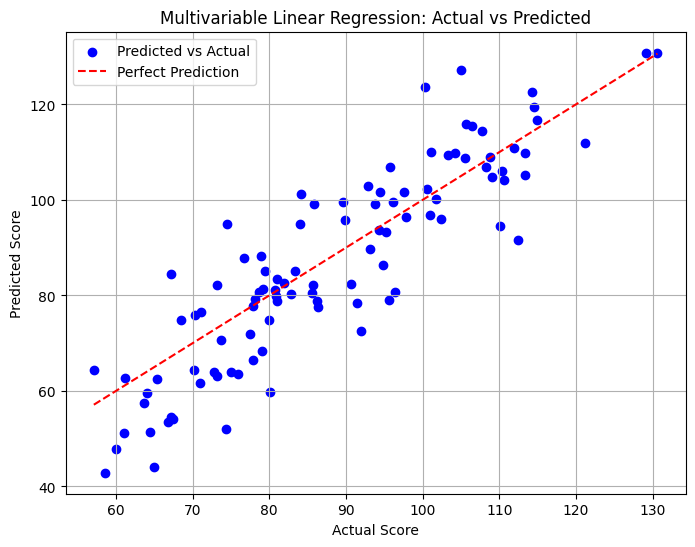

In [67]:
# Recalculate predictions using the final weights
y_pred = X.dot(weights)

# Plot actual vs predicted scores
plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Multivariable Linear Regression: Actual vs Predicted')
plt.legend()
plt.grid(True)
plt.show()

## Polynomial Regression (Mathematical Explanation)

Polynomial Regression is a type of Linear Regression where the relationship between the input variables ($x$) and the output variable ($y$) is modeled as an $n^{th}$-degree polynomial.

###  Hypothesis Function

For a **single feature** $x$, a degree-2 polynomial regression looks like:

$$
\hat{y} = w_0 + w_1x + w_2x^2
$$

For a **degree-$d$** polynomial:

$$
\hat{y} = w_0 + w_1x + w_2x^2 + \dots + w_dx^d
$$

This is still **linear in the parameters** $w_0, w_1, \dots, w_d$, which is why it can be solved using Linear Regression techniques.

---

###  Multivariable Polynomial Regression

Suppose you have input features:

$$
X = [x_1, x_2, x_3]
$$

A **second-degree polynomial expansion** might include:

- Linear terms: $x_1$, $x_2$, $x_3$  
- Squared terms: $x_1^2$, $x_2^2$, $x_3^2$  
- Interaction terms: $x_1x_2$, $x_1x_3$, $x_2x_3$

So the hypothesis becomes:

$$
\hat{y} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_1^2 + w_5x_2^2 + w_6x_3^2 + w_7x_1x_2 + w_8x_1x_3 + w_9x_2x_3
$$

---

###  Why Use Polynomial Regression?

- Captures **non-linear patterns** in data while still using a linear model.
- Offers **greater flexibility** than basic linear regression.
- Still trainable using **gradient descent** or **normal equations**.

---

###  Note

- Polynomial Regression can **overfit** if degree is too high.
- It's important to **normalize** your input features before applying higher-degree terms to avoid exploding values.


### First we have to expand our Features

 - Transform : [StudyTime, SleepHours, SocialMediaHours]
 - Into : [StudyTime, StudyTime², SleepHours, SleepHours², SocialMediaHours, SocialMediaHours², StudyTime*SleepHours, ...]

 - Takes a 2D array of shape (n_samples, 3) and expands each row into 9 features:
  - Linear: x_1, x_2, x_3
  - Quadratic: x_1^2, x_2^2, x_3^2
  - Interaction: x_1x_2, x_1x_3, x_2x_3

In [68]:
def expand_polynomial_features(X):
    m, n = X.shape
    poly_features = []

    for i in range(m):
        row = []

        # Original features
        x1, x2, x3 = X[i]

        # Linear terms
        row.extend([x1, x2, x3])

        # Squared terms
        row.extend([x1**2, x2**2, x3**2])

        # Interaction terms
        row.extend([x1*x2, x1*x3, x2*x3])

        poly_features.append(row)

    return np.array(poly_features)

In [71]:
# Step 1: Generate synthetic dataset
np.random.seed(42)
n = 100
study_time = np.random.uniform(0, 10, n)
sleep_hours = np.random.uniform(4, 9, n)
social_media_hours = np.random.uniform(0, 5, n)

# Adding Gaussian Noise to simulate real world randomness
noise = np.random.normal(0, 5, n)

# True (nonlinear) relationship, Polynomial Relationship construction
score = (
    5 * study_time +
    3 * sleep_hours -
    2 * social_media_hours +
    1.2 * study_time**2 +
    0.5 * sleep_hours * social_media_hours +
    noise
)

# Construct DataFrame
df = pd.DataFrame({
    'StudyTime': study_time,
    'SleepHours': sleep_hours,
    'SocialMediaHours': social_media_hours,
    'Score': score
})

In [85]:
# Step 3: Prepare inputs
from sklearn.model_selection import train_test_split

# Take the Inputs, X Dataset
X_raw = df[['StudyTime', 'SleepHours', 'SocialMediaHours']].values
y = df['Score'].values

# Use SKLearn to make multiple Datasets
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# New expanded Polynomial Dataset
X_train = expand_polynomial_features(X_train_raw)
X_test = expand_polynomial_features(X_test_raw)


In [87]:
# Step 4: Train using gradient descent on train dataset
m, n = X_train.shape
weights = np.zeros(n)
learning_rate = 0.0001
epochs = 10000
losses = []

# Same Learning Algorithm as Before
for epoch in range(epochs):
    y_pred = X_train.dot(weights)
    error = y_pred - y_train
    gradient = (2/m) * X_train.T.dot(error)
    weights -= learning_rate * gradient

    if epoch % 1000 == 0:
        loss = np.mean(error**2)
        losses.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")


Epoch 0, Loss: 9533.7560
Epoch 1000, Loss: 31.5431
Epoch 2000, Loss: 26.2206
Epoch 3000, Loss: 23.0820
Epoch 4000, Loss: 21.1595
Epoch 5000, Loss: 19.9602
Epoch 6000, Loss: 19.1991
Epoch 7000, Loss: 18.7049
Epoch 8000, Loss: 18.3743
Epoch 9000, Loss: 18.1445


In [88]:
# Step 5: Show learned weights
feature_names = [
    "StudyTime", "SleepHours", "SocialMediaHours",
    "StudyTime^2", "SleepHours^2", "SocialMediaHours^2",
    "StudyTime*SleepHours", "StudyTime*SocialMediaHours", "SleepHours*SocialMediaHours"
]
for name, w in zip(feature_names, weights):
    print(f"{name:<30} = {w:.4f}")


StudyTime                      = 3.1213
SleepHours                     = 2.4556
SocialMediaHours               = 0.7722
StudyTime^2                    = 1.2755
SleepHours^2                   = 0.0658
SocialMediaHours^2             = -0.0694
StudyTime*SleepHours           = 0.2132
StudyTime*SocialMediaHours     = 0.0127
SleepHours*SocialMediaHours    = 0.2095


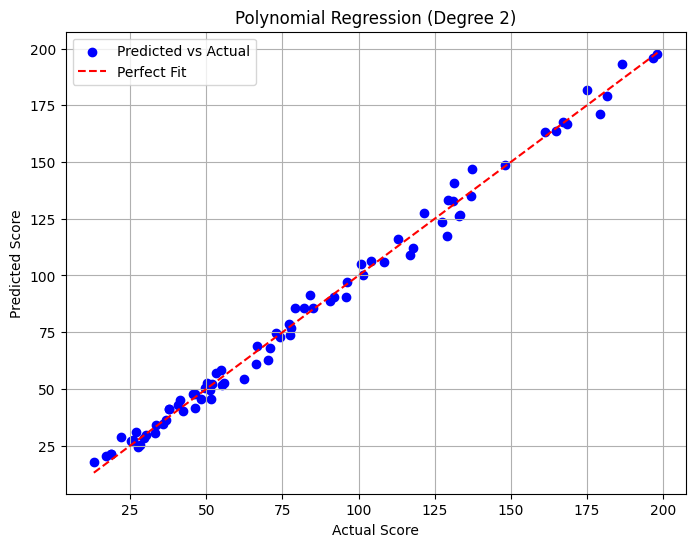

In [90]:
# Step 6: Plot predictions vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', label='Perfect Fit')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.title('Polynomial Regression (Degree 2)')
plt.legend()
plt.grid(True)
plt.show()

In [91]:
# Meassure Loss on Both Sides

# After training
y_train_pred = X_train.dot(weights)
y_test_pred = X_test.dot(weights)

train_loss = np.mean((y_train - y_train_pred) ** 2)
test_loss = np.mean((y_test - y_test_pred) ** 2)

print(f"Train Loss: {train_loss:.4f}")
print(f"Test Loss: {test_loss:.4f}")

Train Loss: 17.9774
Test Loss: 52.1884


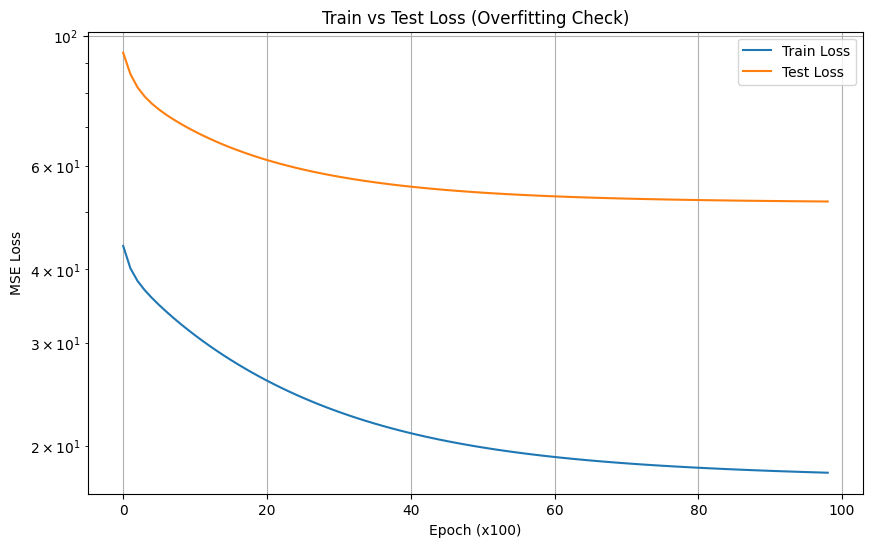

In [98]:
# Massive Difference in Losses can show OVerfitting
# Lets now train again to track losses
m, n = X_train.shape
weights = np.zeros(n)
learning_rate = 0.0001
epochs = 10000

train_losses = []
test_losses = []

for epoch in range(epochs):
    y_pred_train = X_train.dot(weights)
    error = y_pred_train - y_train
    gradient = (2/m) * X_train.T.dot(error)
    weights -= learning_rate * gradient

    # Log loss every 100 epochs
    if epoch % 100 == 0:
        train_loss = np.mean((y_train - y_pred_train) ** 2)
        test_loss = np.mean((y_test - X_test.dot(weights)) ** 2)
        train_losses.append(train_loss)
        test_losses.append(test_loss)

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses[1:], label='Train Loss')
plt.plot(test_losses[1:], label='Test Loss')
plt.xlabel('Epoch (x100)')
plt.ylabel('MSE Loss')
plt.title('Train vs Test Loss (Overfitting Check)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale to handle large first loss
plt.show()

### Graph Above Shows the difference in Losses

While they both converge as Epochs increase the Train still has a much lower loss showing some signs of Overfitting, common with polynomial regression

## What is Regularization?

Regularization is a method used to **reduce overfitting** by penalizing large model parameters.  
It encourages the model to find **simpler functions** that generalize better to new data.

---

## L2 Regularization (Ridge Regression)

In L2 regularization, we modify the cost function as:

$$
\text{Loss} = \frac{1}{n} \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 + \lambda \sum_{j=1}^{k} w_j^2
$$

### Explanation:
- The first term: **Mean Squared Error (MSE)** — measures prediction error.
- The second term: **L2 penalty** — discourages large weights.
- $\lambda$ (**lambda**): Regularization strength. Higher $\lambda$ = more penalty.

---

## Why Use It?

- Prevents **overfitting** by simplifying the model.
- Reduces **variance** without increasing **bias** too much.
- Common in **ridge regression**, where it balances fitting accuracy and model complexity.

In [110]:
# Step 4: Gradient Descent with L2 Regularization (Ridge)
m, n = X_train.shape
weights = np.zeros(n)
learning_rate = 0.0001
epochs = 10000
lambda_reg = 1.0  # ← You can tune this!

train_losses = []
test_losses = []

for epoch in range(epochs):
    y_pred_train = X_train.dot(weights)
    error = y_pred_train - y_train

    # Gradient with L2 penalty (excluding bias term at index 0 if needed)
    gradient = (2/m) * X_train.T.dot(error) + 2 * lambda_reg * weights

    weights -= learning_rate * gradient

    # Log losses
    if epoch % 100 == 0:
        train_loss = np.mean((y_train - y_pred_train) ** 2) + lambda_reg * np.sum(weights ** 2)
        test_loss = np.mean((y_test - X_test.dot(weights)) ** 2) + lambda_reg * np.sum(weights ** 2)
        train_losses.append(train_loss)
        test_losses.append(test_loss)


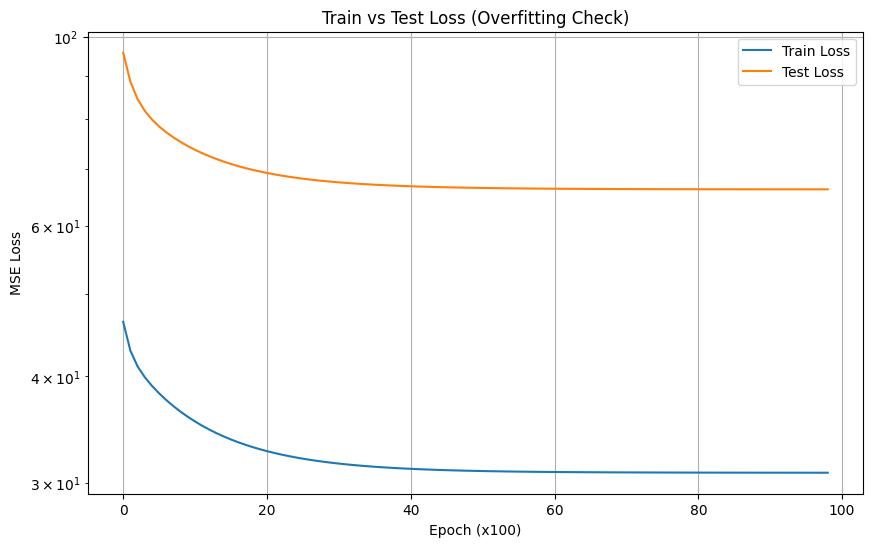

In [111]:
# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses[1:], label='Train Loss')
plt.plot(test_losses[1:], label='Test Loss')
plt.xlabel('Epoch (x100)')
plt.ylabel('MSE Loss')
plt.title('Train vs Test Loss (Overfitting Check)')
plt.legend()
plt.grid(True)
plt.yscale('log')  # Log scale to handle large first loss
plt.show()

## As can be seen by the graphs above the Lambda Regularization has reduced the Losses for High epochs, reducing Overfitting